#  __UFC Fights__ &copy;

**Autores**

_Grupo 9_
1. Alicia Viñas
2. Mario Algara
3. Andres Billingsley
4. Daniel Navarro

El dataset que vamos a analizar contiene información relativa a las peleas de **UFC** (Ultimate Fighting Championship) desde 2013. Contiene información muy precisa sobre distintos aspectos de este deporte, a través de los cuales vamos a intentar sacar algunas conclusiones.

## 1. Objetivo General

Mediante el siguiente dataset, pretendemos realizar un estudio mediante la comparación de diferentes variables, con el fin de determinar si existe cierta relación éstas. Será interesante poder realizar ciertras predicciones a cerca de que luchador ganaría atendiendo a ciertos parámetros.

### 1.1. Apertura y visualización del dataset

Como es costumbre, procedemos a cargar la librería que vamos a necesitar para llevar a cabo la visualización y limpieza de nuestro dataset, en este caso, `pandas`.

Una vez importada la librería, abrimos nuestro dataset de la siguiente forma: ___ufc = pd.read_csv('dat/dataufc.csv', index_col=False)___. Al fichero resultante le vamos a denominar `ufc`.

In [14]:
import pandas as pd
ufc = pd.read_csv('dat/dataufc.csv', index_col=False)

ufc

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,1,1,23.0,182.0,Trento Italy,2783,Mezzocorona Italy,Marvin Vettori,84,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1,0,0,32.0,175.0,"Careiro da Várzea, Amazonas Brazil",2208,"Pharr, Texas USA",Carlos Diego Ferreira,70,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
2,2,0,38.0,172.0,Kanagawa Japan,721,Tokyo Japan,Takanori Gomi,70,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,23.0,170.0,Tijuana Mexico,2825,Tijuana Mexico,Brandon Moreno,56,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB,blue
4,3,1,30.0,167.0,"Spokane, WA USA",2260,"Spokane, WA USA",Elizabeth Phillips,61,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,0,0,26.0,172.0,"Tlaltenango, Zacatecas Mexico",2355,"San Diego, California USA",Jose Quinonez,61,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
1473,2,1,26.0,165.0,"Tampa, Florida USA",2610,"Tampa, Florida USA",Geane Herrera,56,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DEC,red
1474,3,2,36.0,187.0,"Doylestown, Pennsylvania USA",1694,"Dana Point, California USA",Patrick Cummins,93,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1475,3,1,31.0,167.0,Irvine Scotland,2339,Glasgow Scotland,Joanne Calderwood,52,0.0,...,0.0,0.0,0.0,0.0,0.0,301.0,0.0,301.0,KO/TKO,blue


### 1.2. Explorando el dataset

El dataset en cuestión cuenta con un total de 895 columnas y 1477 filas. Mucha de esta información es poco relevante para nuestro análisis, por lo que vamos a seleccionar aquella que pueda aportar más valor.

Antes de empezar a trabajar, es necesario visualizar nuestra tabla con el fin de conocer el nombre de nuestras columnas y así escoger las que sean de mayor interees para nuestro análisis. Debido a la enorme cantidad de columnas que tenemos, no es posible examinar todas ellas con el comando ___head.()___.

Por tanto, procedemos a mostrarlos en formato lista mediante el comando ___cols = ufc.columns.tolist ()___, de esta forma podemos obsrvar y elegir que columnas son de nuestro interés.

In [15]:
cols = ufc.columns.tolist ()
cols

['BPrev',
 'BStreak',
 'B_Age',
 'B_Height',
 'B_HomeTown',
 'B_ID',
 'B_Location',
 'B_Name',
 'B_Weight',
 'B__Round1_Grappling_Reversals_Landed',
 'B__Round1_Grappling_Standups_Landed',
 'B__Round1_Grappling_Submissions_Attempts',
 'B__Round1_Grappling_Takedowns_Attempts',
 'B__Round1_Grappling_Takedowns_Landed',
 'B__Round1_Strikes_Body Significant Strikes_Attempts',
 'B__Round1_Strikes_Body Significant Strikes_Landed',
 'B__Round1_Strikes_Body Total Strikes_Attempts',
 'B__Round1_Strikes_Body Total Strikes_Landed',
 'B__Round1_Strikes_Clinch Body Strikes_Attempts',
 'B__Round1_Strikes_Clinch Body Strikes_Landed',
 'B__Round1_Strikes_Clinch Head Strikes_Attempts',
 'B__Round1_Strikes_Clinch Head Strikes_Landed',
 'B__Round1_Strikes_Clinch Leg Strikes_Attempts',
 'B__Round1_Strikes_Clinch Leg Strikes_Landed',
 'B__Round1_Strikes_Clinch Significant Kicks_Attempts',
 'B__Round1_Strikes_Clinch Significant Kicks_Landed',
 'B__Round1_Strikes_Clinch Significant Punches_Attempts',
 'B__Rou

Observando el nombre de las columnas, en función del color del luchador, seleccionamos aquellas que nos parezcan más relevantes para nuestro análisis:

- `Fight_ID`: Identificador de la pelea.
- `Date`: Fecha de la pelea.
- `Location`: Ubicación de la pelea del luchador.
- `HomeTown`: Ciudad natal del luchador.
- `Age`: Edad del luchador.
- `Height`: Altura del luchador.
- `Weigh`: Peso del luchador.
- `Prev`: Peleas anteriores del luchador.
- `winner`: ¿Quién fue el ganador de la pelea?
- `winby`: ¿Cómo ganó la pelea el luchador? 
- `Max_round`: Número de rondas del combate.
- `Streak`: Racha de victorias del luchador.
- `Clinch Head Strikes_Landed`: Número de golpes en combate cercano en la cabeza asestados por un luchador.
- `Clinch Body Strikes_Landed`: Número de golpes en combate cercano en el cuerpo asestados por un luchador.
- `Distance Head Strikes_Landed`: Número de golpes en combate lejano en la cabeza asestados por un luchador.
- `Distance Body Strikes_Landed`: Número de golpes en combate lejano en el cuerpo asestados por un luchador.

### 1.3. Selección de variables

Una vez localizadas las columnas sobre las que vamos a trabajar, procedemos a creas una nueva tabla con el nombre `ufc2`, mediante el código ___ufc2 = ufc[["Columnas relevantes]]___, en la que se incluyan sólamente estas variables, ya que el resto no son de importancia para nuestro estudio.


In [16]:
ufc2 = ufc[['Fight_ID', 'Date', 'winner', 'winby', 'Max_round', 
           'BPrev', 'BStreak', 'B_Age', 'B_Height', 'B_Location', 'B_HomeTown',
           'B__Round1_Strikes_Clinch Body Strikes_Landed','B__Round1_Strikes_Clinch Head Strikes_Landed',
           'B__Round1_Strikes_Distance Body Strikes_Landed', 'B__Round1_Strikes_Distance Head Strikes_Landed',
           'B__Round2_Strikes_Clinch Body Strikes_Landed','B__Round2_Strikes_Clinch Head Strikes_Landed',
           'B__Round2_Strikes_Distance Body Strikes_Landed', 'B__Round2_Strikes_Distance Head Strikes_Landed',
           'B__Round3_Strikes_Clinch Body Strikes_Landed','B__Round3_Strikes_Clinch Head Strikes_Landed',
           'B__Round3_Strikes_Distance Body Strikes_Landed', 'B__Round3_Strikes_Distance Head Strikes_Landed',
           'B__Round4_Strikes_Clinch Body Strikes_Landed','B__Round4_Strikes_Clinch Head Strikes_Landed',
           'B__Round4_Strikes_Distance Body Strikes_Landed', 'B__Round4_Strikes_Distance Head Strikes_Landed',
           'B__Round5_Strikes_Clinch Body Strikes_Landed','B__Round5_Strikes_Clinch Head Strikes_Landed',
           'B__Round5_Strikes_Distance Body Strikes_Landed', 'B__Round5_Strikes_Distance Head Strikes_Landed',
           'RPrev', 'RStreak', 'R_Age','R_Height', 'R_Location', 'R_HomeTown',
           'R__Round1_Strikes_Clinch Body Strikes_Landed','R__Round1_Strikes_Clinch Head Strikes_Landed',
           'R__Round1_Strikes_Distance Body Strikes_Landed', 'R__Round1_Strikes_Distance Head Strikes_Landed',
           'R__Round2_Strikes_Clinch Body Strikes_Landed','R__Round2_Strikes_Clinch Head Strikes_Landed',
           'R__Round2_Strikes_Distance Body Strikes_Landed', 'R__Round2_Strikes_Distance Head Strikes_Landed',
           'R__Round3_Strikes_Clinch Body Strikes_Landed','R__Round3_Strikes_Clinch Head Strikes_Landed',
           'R__Round3_Strikes_Distance Body Strikes_Landed', 'R__Round3_Strikes_Distance Head Strikes_Landed',
           'R__Round4_Strikes_Clinch Body Strikes_Landed','R__Round4_Strikes_Clinch Head Strikes_Landed',
           'R__Round4_Strikes_Distance Body Strikes_Landed', 'R__Round4_Strikes_Distance Head Strikes_Landed',
           'R__Round5_Strikes_Clinch Body Strikes_Landed','R__Round5_Strikes_Clinch Head Strikes_Landed',
           'R__Round5_Strikes_Distance Body Strikes_Landed', 'R__Round5_Strikes_Distance Head Strikes_Landed'
          ]]

## 2. Limpieza de datos

Hasta este momento, lo único que hemos realizado es abrir nuestro csv con el nombre de `ufc`, el cual contenía todas las  columnas o variables del dataset y posteriormente, hemos creado una nueva tabla llamada `ufc2` en la que únicamente tenemos las columnas que nos eran de interés.

### 2.1. Cambio de nombre de las columnas

A continuación, procederemos con la limpieza de los datos de nuestra tabla con el fin de poder realizar las diferentes comparaciones. Para ello, comenzamos cambiando los nombres de nuestras columnas para que tengan un formato común y su manejo sea mas fácil. `ufc2`

Esta acción se realia así, ___ufc2.columns = ["Columnas con nombres nuevos"]___ y lo comprobamos realizando un ___head()___ a la tabla `ufc2`. Observamos que, efectivamente, se han cambiado los nobres de nuestras variables.

In [17]:
ufc2.columns = ['fight_id', 'date', 'winner', 'winby', 'max_round', 
                'b_prev', 'b_streak', 'b_age', 'b_height', 'b_location', 'b_hometown',
                'b_round1_strikes_clinch_body','b_round1_strikes_clinch_head',
                'b_round1_strikes_distance_body', 'b_round1_strikes_distance_head',
                'b_round2_strikes_clinch_body','b_round2_strikes_clinch_head',
                'b_round2_strikes_distance_body', 'b_round2_strikes_distance_head',
                'b_round3_strikes_clinch_body','b_round3_strikes_clinch_head',
                'b_round3_strikes_distance_body', 'b_round3_strikes_distance_head',
                'b_round4_strikes_clinch_body','b_round4_strikes_clinch_head',
                'b_round4_strikes_distance_body', 'b_round4_strikes_distance_head',
                'b_round5_strikes_clinch_body','b_round5_strikes_clinch_head',
                'b_round5_strikes_distance_body', 'b_round5_strikes_distance_head',
                'r_prev', 'r_streak', 'r_age', 'r_height', 'r_location', 'r_hometown',
                'r_round1_strikes_clinch_body','r_round1_strikes_clinch_head',
                'r_round1_strikes_distance_body', 'r_round1_strikes_distance_head',
                'r_round2_strikes_clinch_body','r_round2_strikes_clinch_head',
                'r_round2_strikes_distance_body', 'r_round2_strikes_distance_head',
                'r_round3_strikes_clinch_body','r_round3_strikes_clinch_head',
                'r_round3_strikes_distance_body', 'r_round3_strikes_distance_head',
                'r_round4_strikes_clinch_body','r_round4_strikes_clinch_head',
                'r_round4_strikes_distance_body', 'r_round4_strikes_distance_head',
                'r_round5_strikes_clinch_body','r_round5_strikes_clinch_head',
                'r_round5_strikes_distance_body', 'r_round5_strikes_distance_head'
           ]
ufc2.head()

,fight_id,date,winner,winby,max_round,b_prev,b_streak,b_age,b_height,b_location,...,r_round3_strikes_distance_body,r_round3_strikes_distance_head,r_round4_strikes_clinch_body,r_round4_strikes_clinch_head,r_round4_strikes_distance_body,r_round4_strikes_distance_head,r_round5_strikes_clinch_body,r_round5_strikes_clinch_head,r_round5_strikes_distance_body,r_round5_strikes_distance_head
0,6405,01/02/2017,red,DEC,3,1,1,23.0,182.0,Mezzocorona Italy,...,2.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4786,06/30/2014,blue,SUB,3,0,0,32.0,175.0,"Pharr, Texas USA",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5523,07/27/2015,red,KO/TKO,3,2,0,38.0,172.0,Tokyo Japan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6240,10/03/2016,blue,SUB,3,0,0,23.0,170.0,Tijuana Mexico,...,1.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6226,08/22/2016,red,DEC,3,3,1,30.0,167.0,"Spokane, WA USA",...,5.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2. Detección de valores nulos

Una vez renombradas las variables, es de vital importancia saber si existen datos nulos o  no en nuestra tabla. Para poder llevar a cabo esta acción ejecutamos el siguiente código ___ufc2.isnull().any()___. Como se puede observar, nos aparecen nuestras variables acompañadas de `True` o `False`. Esto nos indica que, efectivamente, hay presencia de datos nulos en aquellas variables que presentan la etiqueta `True`.

In [18]:
ufc2.isnull().any()

fight_id                          False
date                              False
winner                            False
winby                              True
max_round                         False
b_prev                            False
b_streak                          False
b_age                              True
b_height                           True
b_location                         True
b_hometown                         True
b_round1_strikes_clinch_body       True
b_round1_strikes_clinch_head       True
b_round1_strikes_distance_body     True
b_round1_strikes_distance_head     True
b_round2_strikes_clinch_body       True
b_round2_strikes_clinch_head       True
b_round2_strikes_distance_body     True
b_round2_strikes_distance_head     True
b_round3_strikes_clinch_body       True
b_round3_strikes_clinch_head       True
b_round3_strikes_distance_body     True
b_round3_strikes_distance_head     True
b_round4_strikes_clinch_body       True
b_round4_strikes_clinch_head       True


### 2.3. Corrección de datos nulos


Uno de los problemas de este dataset es la presencia de campos vacios `NaN` dentro de columnas importantes como la edad o la altura del luchador. Es preciso solucionar este problema antes de comenzar el análisis del dataset.
Para solucionar este problema, tenemos varias opciones:
- Sustituir los nulos por la media o la mediana
- Eliminar las filas con valores nulos
- Reemplazar los valores nulos por cero


La solución correcta dependerá del tipo de datos con el que tratemos. En nuestro caso:
- Sustituiremos por la media los valores nulos en el resto de columnas de tipo cuantitativo.
- Eliminaremos las filas con valores nulos en datos cualitativos
- Reemplazaremos por cero los valores nulos relativos a las rondas. Un valor nulo (cero) en estas columnas implica que el jugador no ha pasado de ronda.


Para llevar  cabo este proceso, en primer lugar, tenemos que importar la librería `numpy`.

In [19]:
import numpy as np

### 2.3.1. Reemplazo de los valores nulos por la media de cada columna

Una vez importada la librería, vamos a limpiar los valores nulos de las `age` y `height` de luchador azul y la de `age` para el luchador rojo, ya que su columna de `height` no presenta dichos valores, y sustiruirlos por la media de los valores de sus respectivas columnas.

Esto se realiza de la siguiende forma:
- ___ufc2.b_age = ufc2.b_age.fillna(np.mean(ufc2.b_age))___
- ___ufc2.b_height = ufc2.b_height.fillna(np.mean(ufc2.b_height))___
- ___ufc2.r_age = ufc2.r_age.fillna(np.mean(ufc2.r_age))___

Ya tendríamos los valores nulos sustituidos por las medias.

In [20]:
ufc2.b_age = ufc2.b_age.fillna(np.mean(ufc2.b_age))
ufc2.b_height = ufc2.b_height.fillna(np.mean(ufc2.b_height))
ufc2.r_age = ufc2.r_age.fillna(np.mean(ufc2.r_age))

### 2.3.2. Eliminación de filas con valores cualitativos nulos

En este dataset que hay variables cualitativas con valores nulos. Para evitar tener que operar con este tipo de valores, vamos a eliminar las filas de dichas columnas. Para ello utilizaremos el siguiente comando ___ufc2= ufc2.dropna(subset=['winby', 'b_location', 'b_hometown', 'r_location'], how='any')___.


In [22]:
ufc2= ufc2.dropna(subset=['winby', 'b_location', 'b_hometown', 'r_location'], how='any')

### 2.3.3. Sustituir valores nulos por "0"

En este punto, solo nos queda sustituir los valores nulos de las columnas que contienen los datos de tipos de `Strikes`, ya que no tendría sentido sustituir por la media. Aplicamos el siguiente comando ___ufc2 = ufc2.fillna(0)___ le decimos al programa que donde encuentre un nulo, nos lo  cambie por el valor que nos convenga, en este caso por "0".

In [23]:
ufc2 = ufc2.fillna(0)

Tras estos procesos de limpieza comprobamos que efectivamente nuestros datos, ya no incluyen valors nulos de la siguiente forma ___ufc2.isnull().any()___

In [24]:
ufc2.isnull().any()

fight_id                          False
date                              False
winner                            False
winby                             False
max_round                         False
b_prev                            False
b_streak                          False
b_age                             False
b_height                          False
b_location                        False
b_hometown                        False
b_round1_strikes_clinch_body      False
b_round1_strikes_clinch_head      False
b_round1_strikes_distance_body    False
b_round1_strikes_distance_head    False
b_round2_strikes_clinch_body      False
b_round2_strikes_clinch_head      False
b_round2_strikes_distance_body    False
b_round2_strikes_distance_head    False
b_round3_strikes_clinch_body      False
b_round3_strikes_clinch_head      False
b_round3_strikes_distance_body    False
b_round3_strikes_distance_head    False
b_round4_strikes_clinch_body      False
b_round4_strikes_clinch_head      False


Ya tenemos todos los campos completos, pero antes de empezar a analizar la tabla a fondo, es necesario ver si el formato de las columnas es el correcto.

In [25]:
ufc2.dtypes

fight_id                            int64
date                               object
winner                             object
winby                              object
max_round                           int64
b_prev                              int64
b_streak                            int64
b_age                             float64
b_height                          float64
b_location                         object
b_hometown                         object
b_round1_strikes_clinch_body      float64
b_round1_strikes_clinch_head      float64
b_round1_strikes_distance_body    float64
b_round1_strikes_distance_head    float64
b_round2_strikes_clinch_body      float64
b_round2_strikes_clinch_head      float64
b_round2_strikes_distance_body    float64
b_round2_strikes_distance_head    float64
b_round3_strikes_clinch_body      float64
b_round3_strikes_clinch_head      float64
b_round3_strikes_distance_body    float64
b_round3_strikes_distance_head    float64
b_round4_strikes_clinch_body      

Hay algunas columnas cuyos formatos no están bien, por lo que debemos limpiarlas para poder trabajar con ellas:

In [27]:
#Convertimos las columnas de age y strikes de cada luchardor de float a int:

ufc2.iloc[:, 11:31] =ufc2.iloc[:, 11:31].astype(int)
ufc2.iloc[:, 37:60] =ufc2.iloc[:, 37:60].astype(int)

ufc2.b_age = ufc2.b_age.astype(int)
ufc2.r_age = ufc2.r_age.astype(int)

#Por otro lado, queremos que la información relativa a la altura está en formato float

ufc2.r_height = ufc2.r_height.astype(float)


#Date: debe de estar en formato datetime

import re
from datetime import date, datetime

#parece que hay algunas filas que no siguen el formato de la mayoría ('%m/%d/%Y')
ufc2.date = ufc2.date.apply(
    lambda x: pd.to_datetime(x).strftime('%m/%d/%Y'))

#Winby: el formato es correcto, pero podemos simplificar algunos de sus resultados
#KO/TKO significan lo mismo (knockout), así que vamos a simplificarlo a KO.

ufc2.winby = ufc2.winby.replace('KO/TKO', 'KO')

ufc2.dtypes[:60]

fight_id                            int64
date                               object
winner                             object
winby                              object
max_round                           int64
b_prev                              int64
b_streak                            int64
b_age                               int64
b_height                          float64
b_location                         object
b_hometown                         object
b_round1_strikes_clinch_body        int64
b_round1_strikes_clinch_head        int64
b_round1_strikes_distance_body      int64
b_round1_strikes_distance_head      int64
b_round2_strikes_clinch_body        int64
b_round2_strikes_clinch_head        int64
b_round2_strikes_distance_body      int64
b_round2_strikes_distance_head      int64
b_round3_strikes_clinch_body        int64
b_round3_strikes_clinch_head        int64
b_round3_strikes_distance_body      int64
b_round3_strikes_distance_head      int64
b_round4_strikes_clinch_body      

In [28]:
# #Ahora procedemos a realizar la suma de las distintas rondas para obtener el resultado total del combate:

ufc2['b_strikes_clinch_body']= ufc2.iloc[:,[11, 15, 19, 23, 27]].sum(axis=1)

ufc2['b_strikes_clinch_head']= ufc2.iloc[:,[12, 16, 20, 24, 28]].sum(axis=1)

ufc2['b_strikes_distance_body']= ufc2.iloc[:, [13, 17, 21, 25, 29]].sum(axis=1)

ufc2['b_strikes_distance_head']= ufc2.iloc[:, [14, 18, 22, 26, 30]].sum(axis=1)

ufc2['r_strikes_clinch_body']= ufc2.iloc[:,[38, 42, 46, 50, 54]].sum(axis=1)

ufc2['r_strikes_clinch_head']= ufc2.iloc[:,[39, 43, 47, 51, 55]].sum(axis=1)

ufc2['r_strikes_distance_body']= ufc2.iloc[:, [40, 44, 48, 52, 56]].sum(axis=1)

ufc2['r_strikes_distance_head']= ufc2.iloc[:, [41, 45, 49, 53, 57]].sum(axis=1)

#Me quedo con las columnas que me interesan

ufc3 = ufc2[['fight_id', 'date', 'winner', 'winby', 'max_round',
             'b_prev', 'b_streak', 'b_age', 'b_height', 'b_location', 'b_hometown',
             'b_strikes_clinch_body','b_strikes_clinch_head', 'b_strikes_distance_body','b_strikes_distance_head',
             'r_prev', 'r_streak', 'r_age', 'r_height', 'r_location', 'r_hometown',
             'r_strikes_clinch_body','r_strikes_clinch_head', 'r_strikes_distance_body','r_strikes_distance_head'
            ]]
    

ufc3.head()

,fight_id,date,winner,winby,max_round,b_prev,b_streak,b_age,b_height,b_location,...,r_prev,r_streak,r_age,r_height,r_location,r_hometown,r_strikes_clinch_body,r_strikes_clinch_head,r_strikes_distance_body,r_strikes_distance_head
0,6405,01/02/2017,red,DEC,3,1,1,23,182.0,Mezzocorona Italy,...,6,1,27,187.0,"Coconut Creek, Florida United States","João Pessoa, Paraíba Brazil",3,18,57,2
1,4786,06/30/2014,blue,SUB,3,0,0,32,175.0,"Pharr, Texas USA",...,0,0,29,182.0,"Fort Hood, TX USA","Des Moines, IA USA",0,0,0,0
2,5523,07/27/2015,red,KO,3,2,0,38,172.0,Tokyo Japan,...,2,0,32,177.0,"Bridgewater, Massachusetts USA","Brockton, Massachusetts USA",3,2,39,5
3,6240,10/03/2016,blue,SUB,3,0,0,23,170.0,Tijuana Mexico,...,6,4,25,175.0,"Kapolei, HI USA","Honolulu, HI USA",9,27,121,16
4,6226,08/22/2016,red,DEC,3,3,1,30,167.0,"Spokane, WA USA",...,5,2,28,170.0,"Colorado Spring, Colorado United States","Colorado Springs, Colorado United States",47,14,92,29


Ahora tenemos una tabla que contiene la información más relevante por batalla. Hemos resumido los datos de `strikes` por tipo de golpes, que contiene la información de las cinco rondas.
 
Vemos que hay dos tipos de `winner`: 'blue' y 'red'. En lucha libre, antes de la pelea se sortea que luchador pertenece a cada color. Cada fila de `ufc2`, recoge datos de ambos luchadores, indicando en la columna `winner` quien es el ganador. En este análisis buscamos analizar las características de los ganadores, por lo que la información relativa al perdedor no nos interesa. 


Para ello, vamos a dividir las luchas en dos tablas, en función del color. En estas tablas, solo seleccionaremos información relativa al color en cuestión. Es decir, cada fila tendrá información exclusica del jugador ganador. 

In [30]:
# Creamos una tabla para Blue y le cambiamos el nombre

ufc_blue = ufc3[(ufc3.winner == 'blue')]

ufc_blue = ufc_blue[['fight_id', 'date', 'winner', 'winby', 'max_round',
             'b_prev', 'b_streak', 'b_age', 'b_height', 'b_location', 'b_hometown',
             'b_strikes_clinch_body','b_strikes_clinch_head', 'b_strikes_distance_body','b_strikes_distance_head']]

ufc_blue.columns = ['fight_id', 'date', 'winner', 'winby', 'max_round',
             'prev', 'streak', 'age', 'height', 'location', 'hometown',
             'strikes_clinch_body','strikes_clinch_head', 'strikes_distance_body','strikes_distance_head']

#Hacemos lo mismo con el Rojo

ufc_red = ufc3[(ufc3.winner == 'red')]


ufc_red= ufc_red[['fight_id', 'date', 'winner', 'winby', 'max_round',
             'r_prev', 'r_streak', 'r_age', 'r_height', 'r_location', 'r_hometown',
             'r_strikes_clinch_body','r_strikes_clinch_head', 'r_strikes_distance_body','r_strikes_distance_head']]

ufc_red.columns = ['fight_id', 'date', 'winner', 'winby', 'max_round',
             'prev', 'streak', 'age', 'height', 'location', 'hometown',
             'strikes_clinch_body','strikes_clinch_head', 'strikes_distance_body','strikes_distance_head']

ufc_red

,fight_id,date,winner,winby,max_round,prev,streak,age,height,location,hometown,strikes_clinch_body,strikes_clinch_head,strikes_distance_body,strikes_distance_head
0,6405,01/02/2017,red,DEC,3,6,1,27,187.0,"Coconut Creek, Florida United States","João Pessoa, Paraíba Brazil",3,18,57,2
2,5523,07/27/2015,red,KO,3,2,0,32,177.0,"Bridgewater, Massachusetts USA","Brockton, Massachusetts USA",3,2,39,5
4,6226,08/22/2016,red,DEC,3,5,2,28,170.0,"Colorado Spring, Colorado United States","Colorado Springs, Colorado United States",47,14,92,29
5,5655,10/26/2015,red,DEC,3,4,0,30,180.0,Bushmills Northern Ireland,Bushmills Northern Ireland,18,10,49,10
6,5914,02/22/2016,red,DEC,3,4,1,30,187.0,"Lee's Summit, Missouri USA","Newport News, Virginia USA",0,23,118,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,4928,07/21/2014,red,SUB,3,0,0,28,177.0,"Tallaght, Dublin Ireland",Dublin Ireland,0,0,0,0
1471,5631,09/07/2015,red,DEC,3,3,3,38,193.0,"Chicago, Illinois USA",Minsk Belarus,23,7,26,1
1472,5123,11/17/2014,red,DEC,3,0,0,27,167.0,"San Jose, California USA",Estado de Mexico Mexico,0,0,0,0
1473,6146,06/20/2016,red,DEC,3,3,0,31,162.0,Dagestan Republic Russia,Dagestan Republic Russia,8,11,42,25


Una vez tengo las dos tablas con información exclusiva de cada color, las uno para tener toda la información comprimida en una misma tabla (`ufc4`)

In [31]:
ufc4 = pd.concat([ufc_blue, ufc_red], axis=0)
ufc4

,fight_id,date,winner,winby,max_round,prev,streak,age,height,location,hometown,strikes_clinch_body,strikes_clinch_head,strikes_distance_body,strikes_distance_head
1,4786,06/30/2014,blue,SUB,3,0,0,32,175.0,"Pharr, Texas USA","Careiro da Várzea, Amazonas Brazil",0,0,0,0
3,6240,10/03/2016,blue,SUB,3,0,0,23,170.0,Tijuana Mexico,Tijuana Mexico,0,0,0,0
7,5004,09/22/2014,blue,SUB,3,0,0,27,177.0,"Jefferson, Iowa USA","Jefferson, Iowa USA",0,0,0,0
9,5972,03/21/2016,blue,DEC,3,2,1,33,182.0,São Paulo Brazil,"Jales City, Sao Paulo Brazil",16,8,15,36
11,5320,04/13/2015,blue,KO,3,0,0,27,177.0,Fife Scotland,Fife Scotland,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,4928,07/21/2014,red,SUB,3,0,0,28,177.0,"Tallaght, Dublin Ireland",Dublin Ireland,0,0,0,0
1471,5631,09/07/2015,red,DEC,3,3,3,38,193.0,"Chicago, Illinois USA",Minsk Belarus,23,7,26,1
1472,5123,11/17/2014,red,DEC,3,0,0,27,167.0,"San Jose, California USA",Estado de Mexico Mexico,0,0,0,0
1473,6146,06/20/2016,red,DEC,3,3,0,31,162.0,Dagestan Republic Russia,Dagestan Republic Russia,8,11,42,25


## 3. Análisis del dataset

Una vez que hemos manipulado el dataset inicial, podemos proceder a su análisis. Buscamos intentar predecir que variables influyen sobre la victoria del jugador. Para ello vamos a plantearnos una serie de cuestiones que relacionan distintas variables del dataset, y así analizar alguna posible relación.

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from matplotlib import rcParams

rcParams['figure.figsize'] = 20, 15
sns.set_context('talk')

### 3.1.  Edad
A continuación se muestra la relación entre los ganadores y su edad. Se observa que los peleadores que están en el rango de 29-33 años de edad son los que tienen mayor probabilidad de ganar la pelea. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

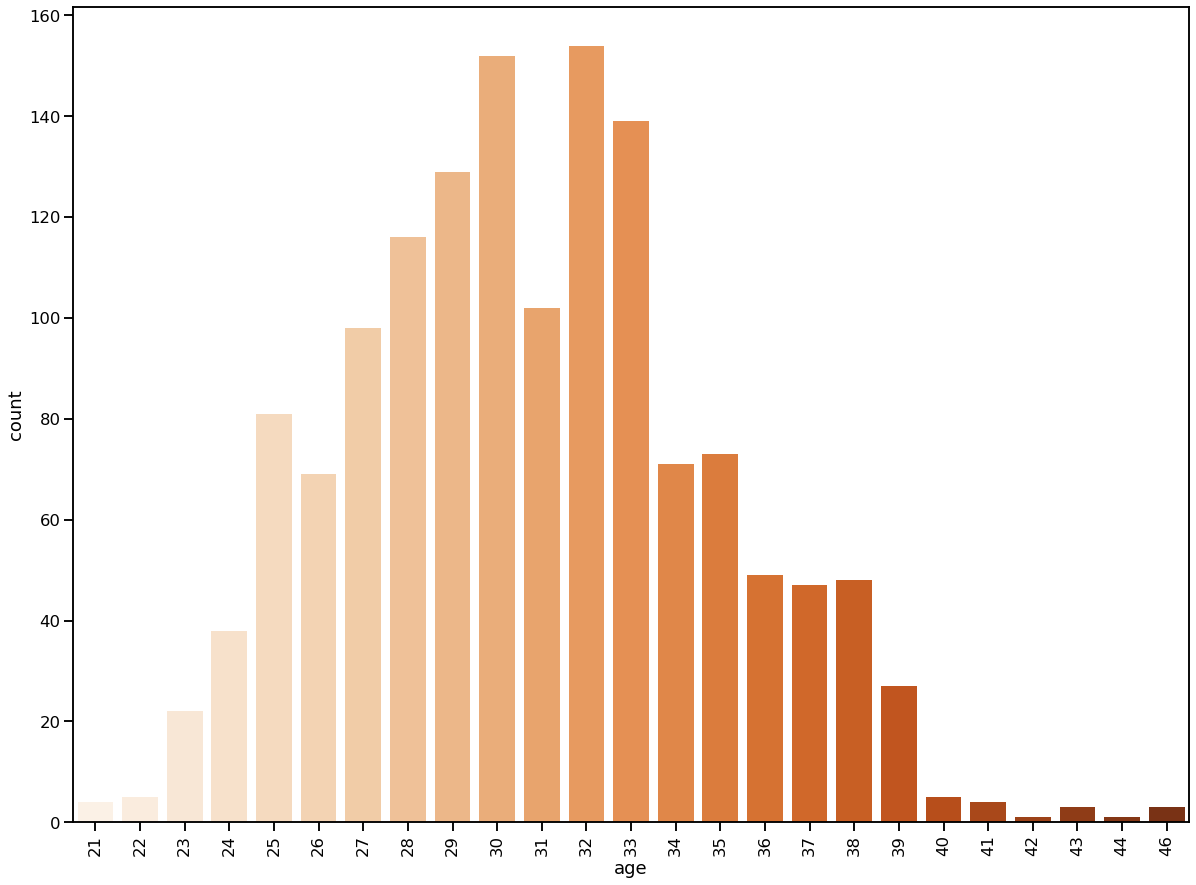

In [45]:
# Edad entre los gandores

out = sns.countplot (x= 'age', data=ufc4, palette="Oranges")
out=plt.xticks(rotation=90)
out

### 3.2.  Altura
En el siguiente gráfico muestra la altura que tienen los ganadores de nuestro dataset.

Podemos decir que, a medida la altura va aumentando hasta llegar a su pico de 1.82 m, el peleador aumenta su ventaja de ganar la pelea.
Curiosamente a medida que va aumentando la altura, la probabilidad de ganar la pelea empieza a disminuir. Sin embargo, si nos fijamos en los peleadores de menor estatura, vemos que su desventaja no es tanta como la de peleadores más altos.

En resumen, la estatura óptima tiende a ser entre 1.75 a 1.85 m.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

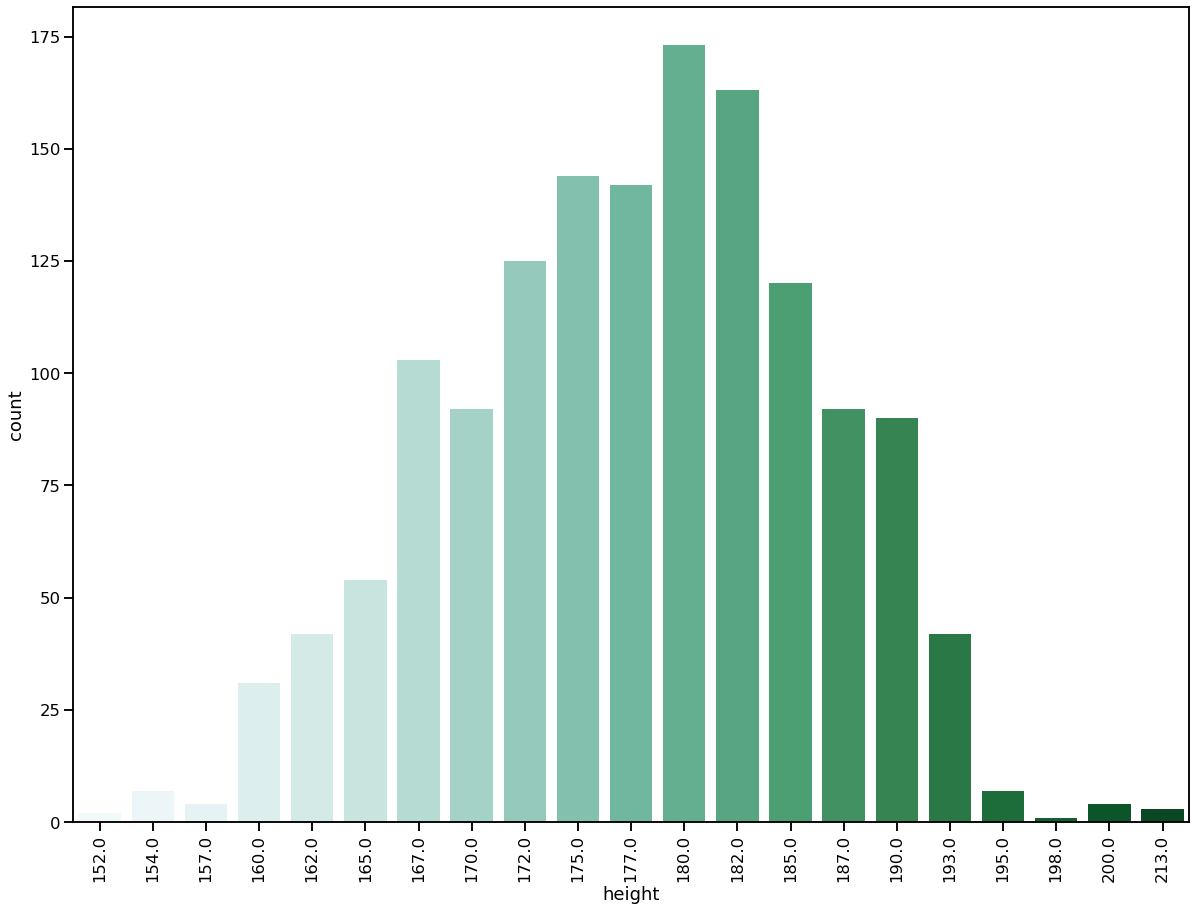

In [46]:
# Altura entre los ganadores

out = sns.countplot (x= 'height', data=ufc4, palette="BuGn")
out=plt.xticks(rotation=90)
out

### 3.3. Tipo de victoria y ronda máxima
El siguiente gráfico, representa la relación entre el tipo de victoria y la ronda máxima en la que se llega.
El significado de las variables utilizadas son las siguientes:
1. Sub = Victoria por sumisión
2. Dec = Victoria por decisión del arbitro
3. KO = Victoria por Knock Out

Tal y como se puede observar, los tres tipos de victorias tienden a una uniformidad en relación con la ronda a la que se llega. En todas ellas no se suele pasar de la ronda tres. También se puede observar que, llegados a esta ronda, es más probable que se acabe la batalla por decisión del árbitro (`DEC`), seguido por sumisión (`SUB`), y por último y menos probable por Knock Outs (`KO`).

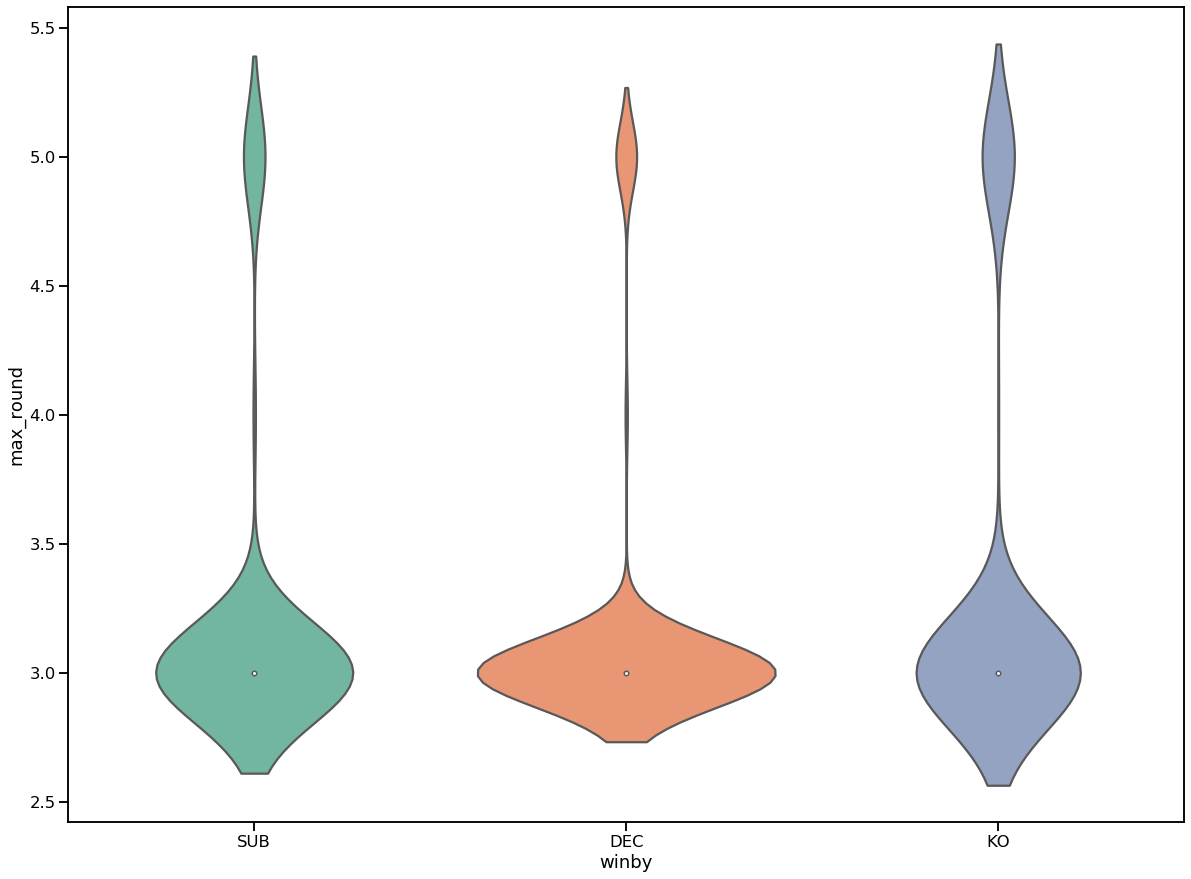

In [47]:
# Relación entre el tipo de victoria y la ronda máxima


out = sns.violinplot(x='winby', y='max_round', data=ufc4, palette= "Set2")

out

### 3.4. Tipo de victoria y altura
En el siguiente gráfico se explora la relación entre la altura del peleador y el tipo de victoria utilizando las variables
discutidas previamente.
1. **Sumisión** (`SUB`): Cuando el peleador tiene una altura de 1.75 m, la pelea tiende acabar por medio de sumisión. Uniformemente descendiendo por ambos lados con respecto a la altura del peleador. Es decir, a medida el peleador incrementa en altura es 
más improbable que la pelea sea ganada por sumisión. Lo mismo se puede decir con peleadores de menor estatura.
2. **Decisión del árbitro** (`DEC`): A diferencia de la comparación de sumisión y altura, la relación entre decisión arbitraria y altura muestra ser
mucho mas común, por el hecho de que la mayoría de los peleadores tienden a tener una altura promedio entre 1.75 y 1.80.
3. **Knock Out** (`KO`): Con respecto a la relación entre gane por KO y altura, es interesante observar que a medida la altura del peleador incrementa, el gane por KO incremente en probabilidad.


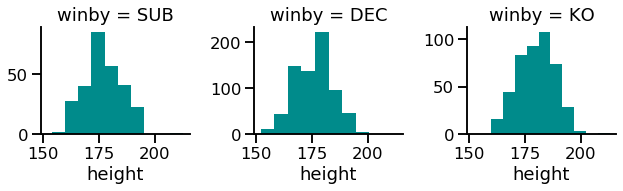

In [48]:
# Relación entre la altura del luchador y como se llevó a cabo la victoria
out = sns.FacetGrid(ufc4, col="winby", sharey= False) 

out.map(plt.hist, "height", bins=10, color='DarkCyan')

### 3.5. Tipo de victoria y edad
En el siguiente gráfico se explora la relación entre la edad del peleador y el tipo de victoria utilizando las variables
discutidas previamente.
1. **Sumisión** (`SUB`): Existe una relación desigual entre la edad del peleador y el gane por sumisión. Con mayores probabilidades de ganar por sumisión cuando la edad del peleador esta en los 29 años. La relación entre edad y sumisión tiende a descender a medida que la edad supera o decae los 29 años.
2. **Decisión del árbitro** (`DEC`): Este gráfico nos muestra que los peleadores con una edad promedio de 30 años aumentan su probabilidad de ganar por medio de decisión arbitral.
3. **Knock Out** (`KO`): A diferencia de los últimos dos gráficos, la relación entre edad y KO muestra ser un poco más peculiar. Donde previamente se mostraba que la edad optima era entre los 29 y 30 años, la edad optima para ganar por KO se encuentra en los 32 años. Posiblemente esto indica que el gane por KO tiende a ser más común entre peleadores con más experiencia en este deporte.

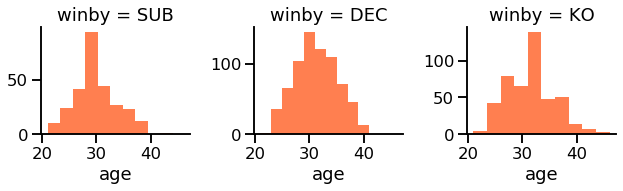

In [49]:
# Relación entre la edad del luchador y como se llevó a cabo la victoria
out = sns.FacetGrid(ufc4, col="winby", sharey= False) 

out.map(plt.hist, "age", bins=10, color='Coral');

### 3.6. Tipo de victoria en relación con la altura y  la edad
En el siguiente diagrama de disperción comparamos la relación entre 3 variables:
1. **Altura**
2. **Edad**
3. **Tipo de victoria**


- Por medio de un análisis visual se puede observar que la relación entre altura, edad y gane por sumisión es bastante uniforme. No parece haber un relación concreta ya que los ganes por sumisión se encuentran uniformemente dispersos en el diagrama.

- A diferencia de gane por sumisión, el gane por decisión tiende a ser más común entre peleadores con una altura de 1.60m-1.80m y una edad entre los 23-37 años. Es en este rango que tienden a ser más comunes, las peleas ganadas por decisión.

- Por contraste, las peleas ganadas por KO tienden a ser más comunes entre los peleadores con una altura mayor a la de 1.80m y una edad superior a los 30 años.

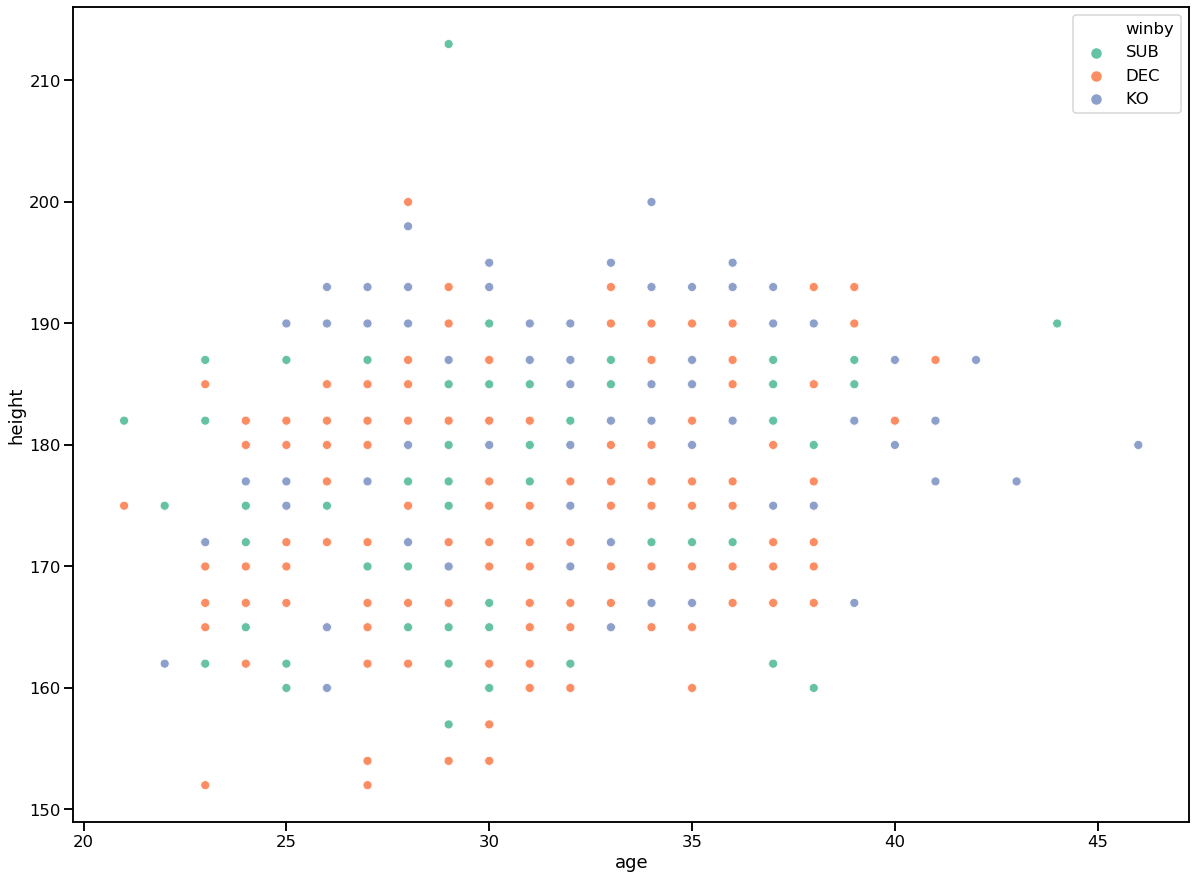

In [50]:
# Relación entre la altura, edad del luchador y como se llevó a cabo la victoria

out = sns.scatterplot(x='age', y='height', hue='winby', palette="Set2", data=ufc4)
out

### 3.7. Tipos de golpe y puntuación

En el siguiente diagrama comparamos 4 variables en relación con su valor. Donde `value` indica la puntuación que se le asigna a cada una de las 4 variables. Las variables consideradas son:
1. `strikes_clinch_body`  Golpes al cuerpo en pelea cercana
2. `strikes_clinch_head`  Golpes a la cabeza en pelea cercana
3. `strikes_distance_body`  Golpes al cuerpo a distancia
4. `strikes_distance_head`  Golpes a la cabeza a distancia

Para ello, vamos a crear una nueva tabla con una distribución distinta de los datos, ya que esto nos facilitará el análisis.

In [52]:
# Separacion de datos por medio de "strikes"
ufc4_melt = pd.melt(ufc4, id_vars =['fight_id',
                                    'date',
                                    'winner',
                                    'winby',
                                    'max_round',
                                    'prev',
                                    'streak',
                                    'age',
                                    'height',
                                    'location',
                                    'hometown'],
                    var_name = ["strikes"])

ufc4_melt.head()

,fight_id,date,winner,winby,max_round,prev,streak,age,height,location,hometown,strikes,value
0,4786,06/30/2014,blue,SUB,3,0,0,32,175.0,"Pharr, Texas USA","Careiro da Várzea, Amazonas Brazil",strikes_clinch_body,0
1,6240,10/03/2016,blue,SUB,3,0,0,23,170.0,Tijuana Mexico,Tijuana Mexico,strikes_clinch_body,0
2,5004,09/22/2014,blue,SUB,3,0,0,27,177.0,"Jefferson, Iowa USA","Jefferson, Iowa USA",strikes_clinch_body,0
3,5972,03/21/2016,blue,DEC,3,2,1,33,182.0,São Paulo Brazil,"Jales City, Sao Paulo Brazil",strikes_clinch_body,16
4,5320,04/13/2015,blue,KO,3,0,0,27,177.0,Fife Scotland,Fife Scotland,strikes_clinch_body,0


Se puede observar que el tipo de golpe con mayor valor son los golpes a distancia al cuerpo y la cabeza respectivamente. Por contraste el tipo de golpe que menos acumula puntos son los golpes cercanos a la cabeza y al cuerpo respectivamente.

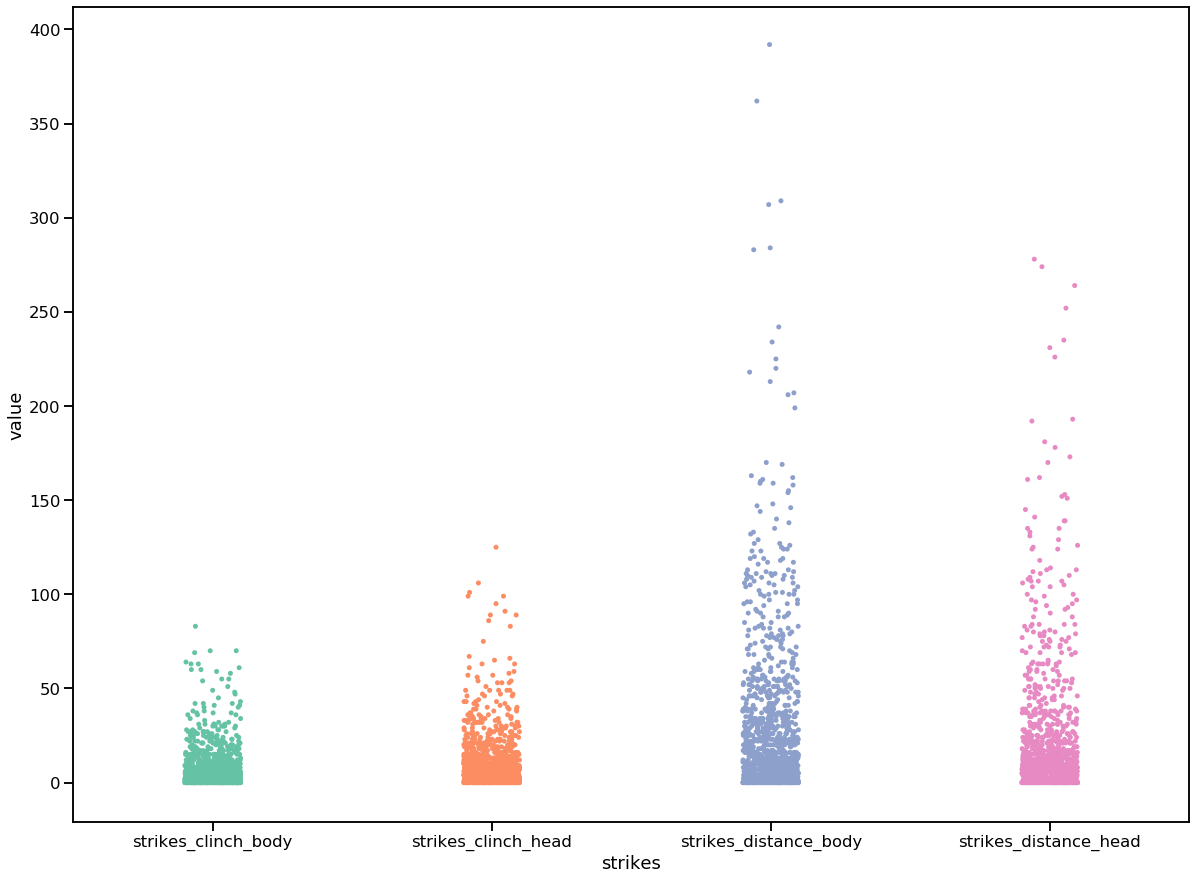

In [53]:
# Creación de gráfico 
out = sns.stripplot(x='strikes', y='value', data=ufc4_melt, palette = "Set2")
out

## 4. Procedencia de los luchadores

### 4.1. Extracción de las diez procedencias más comunes

Nos interesa conocer el `hometown`de los ganadores de nuestro dataset. Para ello, vamos a buscar cuales son los diez lugares de origen más comunes.

In [57]:
# Búsqueda de las diez ciudades natales más comunes
top10 = ufc4['hometown'].value_counts()[:10]
top10

Rio de Janeiro Brazil             35
Sao Paulo Brazil                  25
Dublin Ireland                    19
Dagestan Russia                   16
Denver, Colorado United States    11
Miami, Florida USA                11
Milwaukee, Wisconsin USA          11
Brooklyn, New York USA            10
Oahu, Hawaii USA                  10
San Diego, California USA         10
Name: hometown, dtype: int64

### 4.2. Ubicación por ciudad

Nos interesaría proyectar estas ciudades sobre un **mapa**. Sin embargo, no disponemos de información sobre su ubicación.

Para ello, crearemos un nuevo dataframe que contenga los datos relativos a la `longitud` y `latitud` de las ciudades del `top10`

In [58]:
# Creamos un nuevo dataframe que contiene los datos de longitud y latitud del top 10 ciudades

hometown_data = pd.DataFrame({
   'hometown':['Rio de Janeiro, Brazil', 'Sao Paulo, Brazil', 'Dublin, Ireland', 'Dagestan, Russia', 'Denver, USA', 
           'Miami, USA', 'Milwaukee, USA', 'Brooklyn, USA', 'San Diego, USA', 'Oahu, USA'],
   'latitude':[-22.906847, -23.55052, 53.349804, 42.846581, 39.739235, 
          25.761681, 43.038902, 40.678177, 32.715736, 21.438911],
   'longitude':[-43.172897, -46.633308, -6.26031, 47.633701, -104.99025, 
          -80.191788, -87.906471, -73.94416, -117.161087, -158.000061],
   'value':[35, 25, 19, 16, 11,
            11, 11, 10, 10, 10]
    })

hometown_data

,hometown,latitude,longitude,value
0,"Rio de Janeiro, Brazil",-22.906847,-43.172897,35
1,"Sao Paulo, Brazil",-23.550520,-46.633308,25
2,"Dublin, Ireland",53.349804,-6.260310,19
3,"Dagestan, Russia",42.846581,47.633701,16
4,"Denver, USA",39.739235,-104.990250,11
5,"Miami, USA",25.761681,-80.191788,11
6,"Milwaukee, USA",43.038902,-87.906471,11
7,"Brooklyn, USA",40.678177,-73.944160,10
8,"San Diego, USA",32.715736,-117.161087,10
9,"Oahu, USA",21.438911,-158.000061,10


### 4.3. Mapa con ubicaciones

En el siguiente mapa se observa que la procedencia más común tiende a ser Estados Unidos seguido por peleadores brasileños.

In [59]:
# Mi mapa sobre el mundo
map_ht = folium.Map(location=[10.34, -30.00], zoom_start=2.2, tiles= 'cartodbdark_matter')

# Añadir a mi mapa usando CircleMarker
hometown_data.apply(
    lambda row: folium.CircleMarker([row.latitude, row.longitude], tooltip=row.hometown, color="snow", radius=5).add_to(map_ht),
    axis=1)

map_ht

## 5. Conclusiones

Después de haber analizado los datos, procedemos a sacar algunas conclusiones.


La edad óptima que un peleador debe tener para aumentar sus probabilidades de ganar una pelea está entre los 39 y 33 años de edad. Y su altura también debe ser entre 1.77 y 1.82 metros de altura. Podemos ver que a medida que estas dos variables crecen o disminuyen, la probabilidad que un peleador gane una pelea también disminuye. 


Ahora, en cuanto a los tipos de victoria, podemos ver que también existe una relación entre altura, edad y el tipo de victoria. Por ejemplo, los peleadores más altos tienden a ganar por KO, mientras que los peleadores de menor altura tienden a ganar más peleas por sumisión. 


La edad del peleador también influye en el tipo de victoria. Por ejemplo, los peleadores mayores de 30 años, tienden a ganar más peleas por KO, esto se puede dar debido al hecho de que un peleador mayor tiene más experiencia en el deporte y por lo tanto puede terminar una pelea de forma más rápida. Por contraste los peleadores de menor edad, tienden a ganar más peleas por sumisión.


En cuanto a los tipos de golpes y la puntuación adquirida, podemos ver que los golpes a distancia tienen una tendencia a ganar más puntos que los golpes cercanos. Por lo tanto, un peleador que desea ganar una pelea por decisión del jurado tiene más probabilidades de ganar si tiene más golpes de distancia. 


Finalmente, también hemos hecho un breve análisis para determinar la procedencia de los peleadores. Para ello, hemos categorizado las diez ciudades natales más comunes. Los datos muestran que entre los lugares más comunes se encuentran Brasil y los Estados Unidos. Este dato no es sorprendente ya que ambos países tienen una cultura bien establecida dentro del deporte de las artes marciales.